<a href="https://colab.research.google.com/github/yusufbaykal/Veri-bilimi-kutuphaneleri/blob/main/Veri_G%C3%B6rselle%C5%9Ftirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VERİ GÖRSELLEŞTİRME 

In [ ]:
#Gerekli olan kütüphanelerin ve Veri setinin yüklenmesi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
# Yüklenilen planets adlı veri setimizi df olarak koplayıp ham verimizi kenarda tutuyoruz.
df = planets.copy()

In [ ]:
# Veri setimizi inceliyoruz
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
#Veri setinin özelliklerine bakıyoruz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
# Veri setimizde 2006 yılı öncesi verilere bakıyoruz
df[(df.year < 2006)].head(10)

,method,number,orbital_period,mass,distance,year
6,Radial Velocity,1,1773.400000,4.640,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
13,Radial Velocity,3,1078.000000,2.530,14.08,1996
14,Radial Velocity,3,2391.000000,0.540,14.08,2001
16,Radial Velocity,1,4.230785,0.472,15.36,1995
17,Radial Velocity,5,14.651000,0.800,12.53,1996
18,Radial Velocity,5,44.380000,0.165,12.53,2004
19,Radial Velocity,5,4909.000000,3.530,12.53,2002
25,Radial Velocity,1,116.688400,NaN,18.11,1996
29,Imaging,1,NaN,NaN,45.52,2005


In [ ]:
# Veri setimizin şeklini inceliyoruz. ilk parametre dizinin boyut sayısını, ikinci parametre ise her bir boyuttaki eleman sayısını verir.
df.shape

(1035, 6)

In [ ]:
# Veri setimizin kolonlarına bakıyoruz
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [ ]:
# Veri setimizin dağılım özelliklerine bakıyoruz.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [ ]:
# Verimizdeki eksik gözlem(değer)

df.isnull().values.any()

True

In [ ]:
#hangi değişkede kaçar tane var

df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [ ]:
#boş olan yerler sıfır değerini bastırmak.

df.fillna(df.distance.mean(),inplace=True)

In [ ]:
# Değişkenlerin son durumuna bakıyoruz
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [ ]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [ ]:
# Verimizde Sadece Kategorik Değişken Seçimi

kat_df = df.select_dtypes(include = ["object"])

In [ ]:
kat_df.head(5)

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [ ]:
# Verideki farklı değerlere bakma
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [ ]:
# Kaç adet farklı değer olduğu
kat_df["method"].value_counts().count()

10

In [ ]:
# Değişkenlerin içerisindeki değer sayısı
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

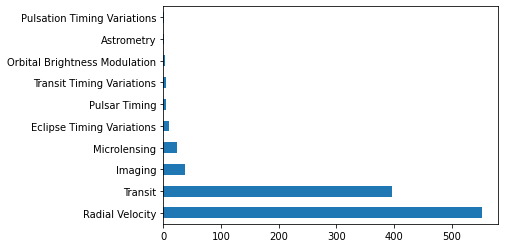

In [ ]:
# Değişkenleri değer sırasına göre sıralama
df["method"].value_counts().plot.barh();

# Dağılım Teknikleri

#Barplot

In [ ]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [ ]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
#ordinal tanımla
import pandas as pd
from pandas.api.types import CategoricalDtype

In [ ]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [ ]:
df.cut =df.cut.astype(CategoricalDtype(ordered=True))

In [ ]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [ ]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [ ]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [ ]:
df.cut =df.cut.astype(CategoricalDtype(categories = cut_kategoriler,ordered = True))

In [ ]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [ ]:
#barplot

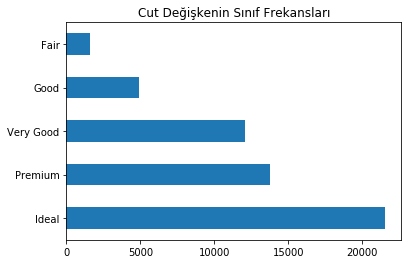

In [ ]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkenin Sınıf Frekansları");

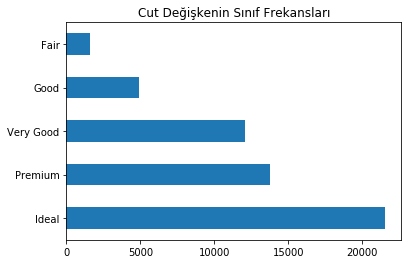

In [ ]:
(df["cut"].
 value_counts()
 .plot.barh()
 .set_title("Cut Değişkenin Sınıf Frekansları"));

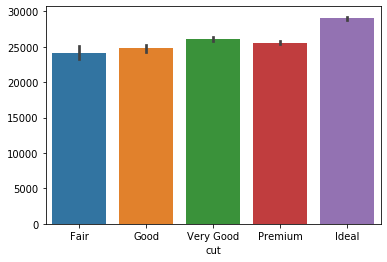

In [ ]:
sns.barplot(x="cut",y=df.cut.index,data=df);

In [ ]:
#Caprazlamalar

import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut =df.cut.astype(CategoricalDtype(categories = cut_kategoriler,ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


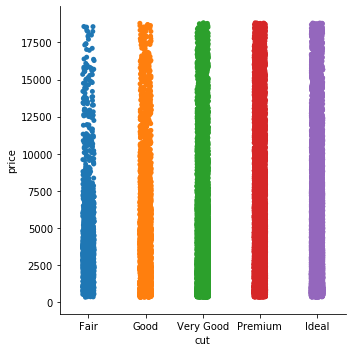

In [ ]:
sns.catplot(x = "cut", y = "price",data=df);

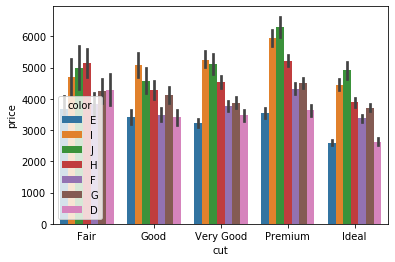

In [ ]:
sns.barplot(x = "cut", y = "price",hue = "color",data=df);

In [ ]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [ ]:
#Histogram

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


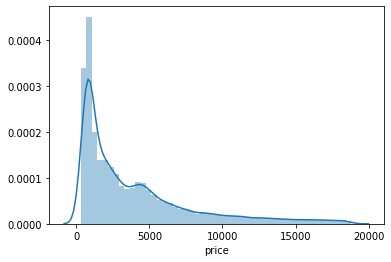

In [ ]:
sns.distplot(df.price);

In [ ]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut =df.cut.astype(CategoricalDtype(categories = cut_kategoriler,ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


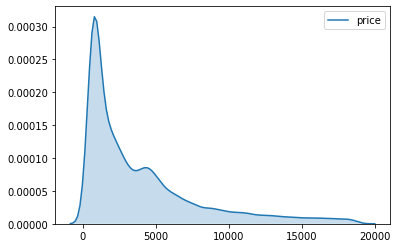

In [ ]:
sns.kdeplot(df.price,shade=True)

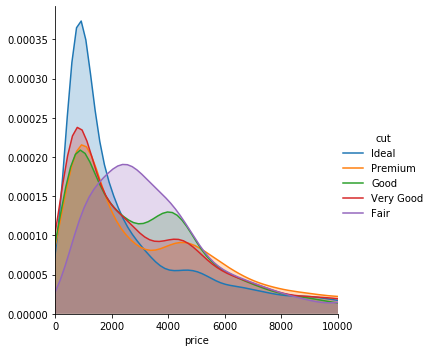

In [ ]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot,"price",shade=True)
.add_legend()
);

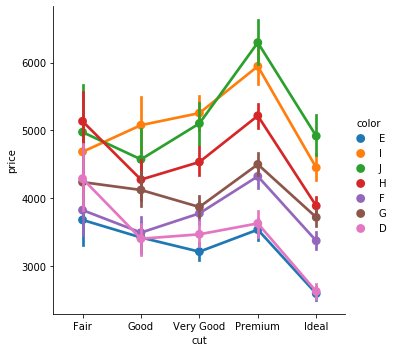

In [ ]:
sns.catplot(x = "cut",y = "price", hue = "color",kind = "point",data=df);

# Boxplot

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

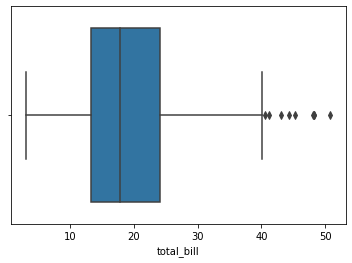

In [ ]:
sns.boxplot(x=df["total_bill"]);


# Çaprazlamalar - (Güne göre kazanç)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


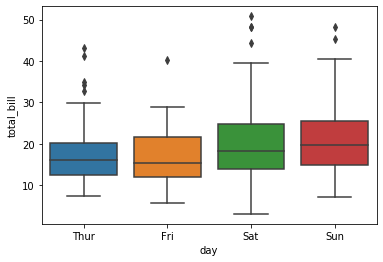

In [ ]:
sns.boxplot(x="day",y = "total_bill",data=df);

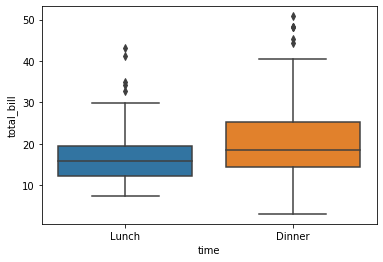

In [ ]:
#sabah mı akşammı daha fazla kazanıyoruz ?
sns.boxplot(x="time",y = "total_bill",data=df);

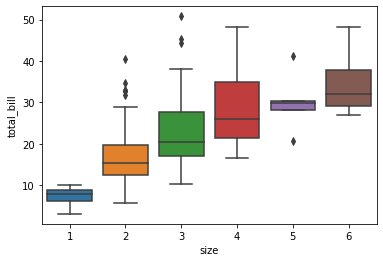

In [ ]:
#kişi sayısı kazanç
sns.boxplot(x="size",y = "total_bill",data=df);

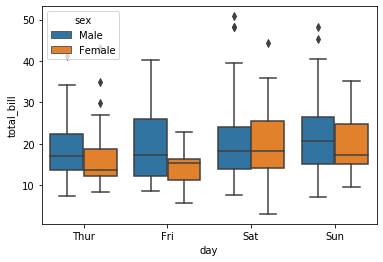

In [ ]:
sns.boxplot(x="day",y = "total_bill",hue="sex",data=df);

# Violin

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


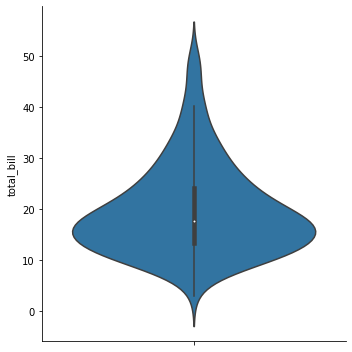

In [ ]:
sns.catplot(y = "total_bill",kind = "violin",data=df);

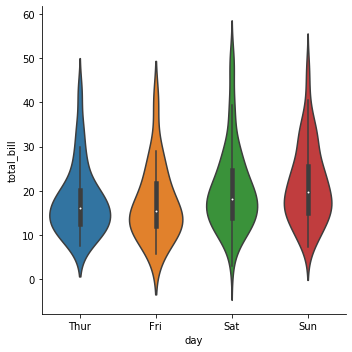

In [ ]:
sns.catplot(x= "day",y = "total_bill",kind = "violin",data=df);

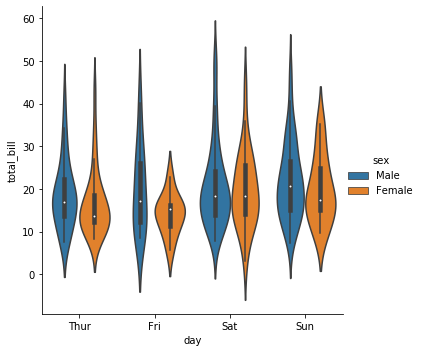

In [ ]:
sns.catplot(x= "day",y = "total_bill",hue="sex",kind = "violin",data=df);

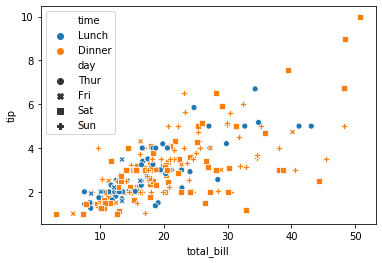

In [ ]:
sns.scatterplot(x = "total_bill",y="tip",hue="time",style="day",data=df);

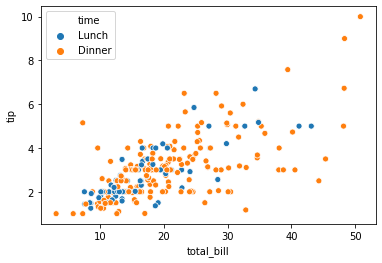

In [ ]:
sns.scatterplot(x = "total_bill",y="tip",hue="time",data=df);

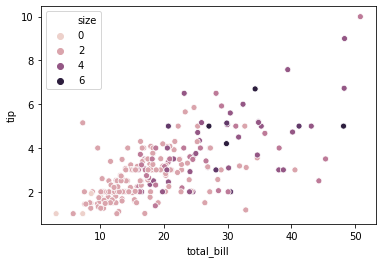

In [ ]:
sns.scatterplot(x = "total_bill",y="tip",hue="size",data=df);

# Doğrusal İlişkinin Gösterilmesi

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

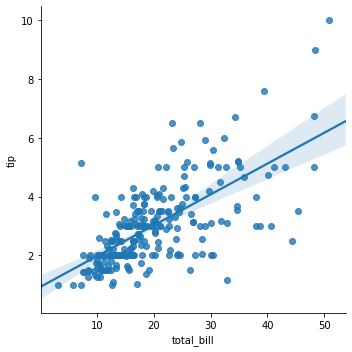

In [ ]:
sns.lmplot(x = "total_bill",y = "tip",data=df);

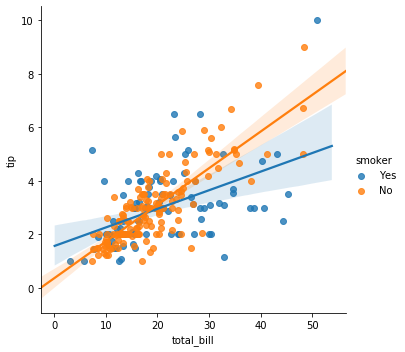

In [ ]:
sns.lmplot(x = "total_bill",y = "tip",hue="smoker",data=df);

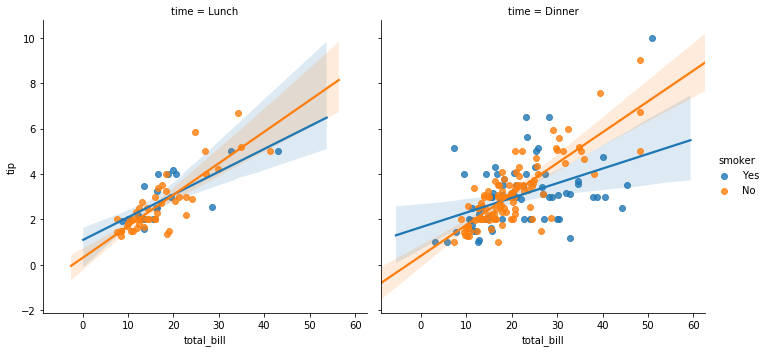

In [ ]:
sns.lmplot(x = "total_bill",y = "tip",hue="smoker",col="time",data=df);

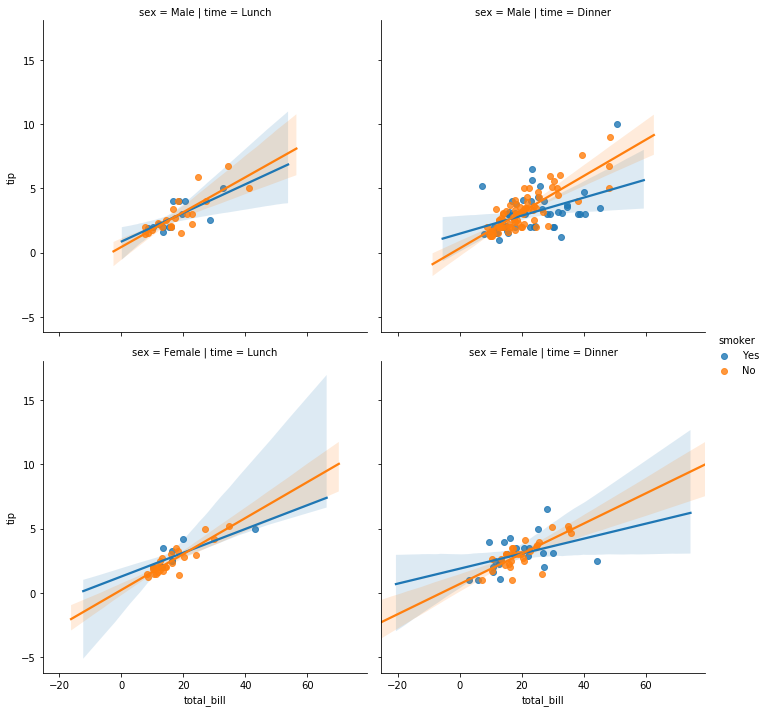

In [ ]:
sns.lmplot(x = "total_bill",y = "tip",hue ="smoker",col ="time",row="sex",data=df);

# Scatter Matrisi

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


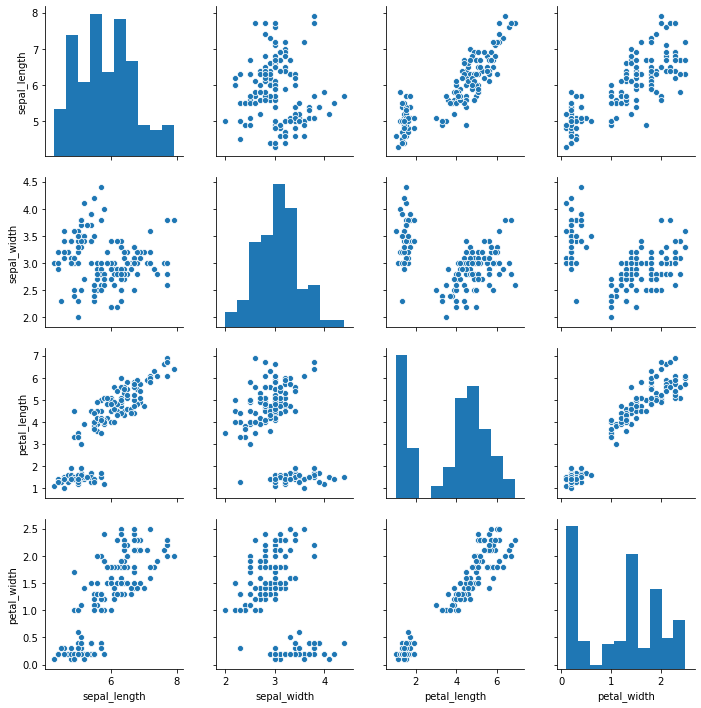

In [ ]:
sns.pairplot(df);

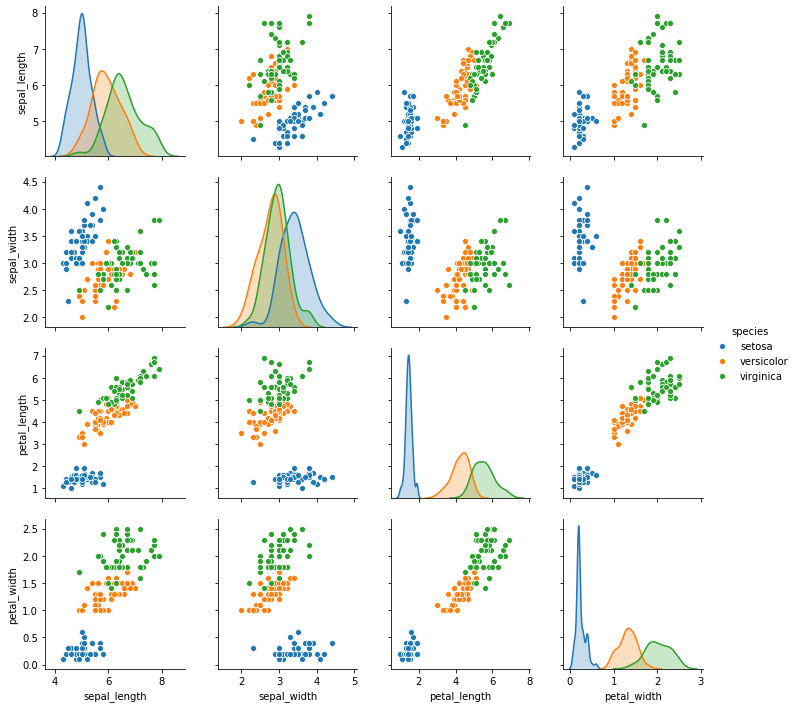

In [ ]:
sns.pairplot(df,hue="species");

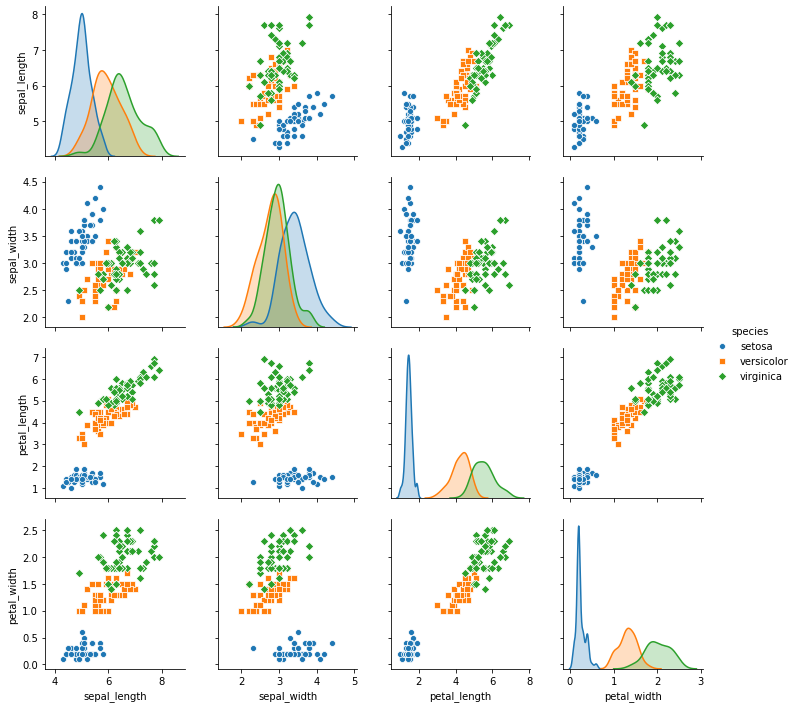

In [ ]:
sns.pairplot(df,hue="species",markers = ["o","s","D"]);

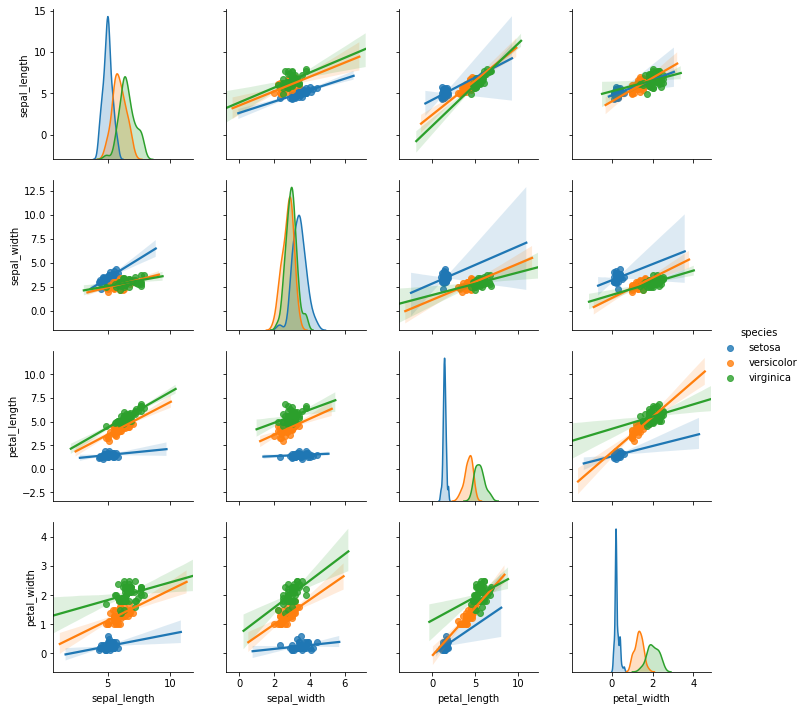

In [ ]:
sns.pairplot(df,kind="reg",hue = "species");

# Isı Haritası 

In [ ]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
df.shape

(144, 3)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [ ]:
df = df.pivot("month","year","passengers")

In [ ]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


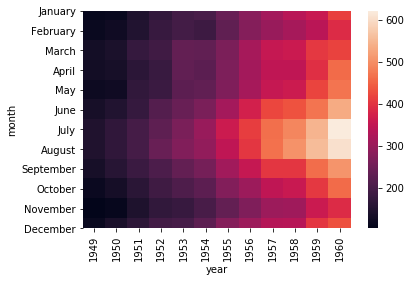

In [ ]:
sns.heatmap(df);

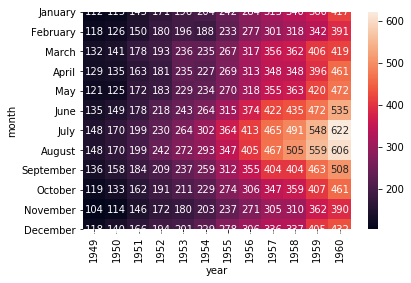

In [ ]:
sns.heatmap(df,annot = True,fmt="d");

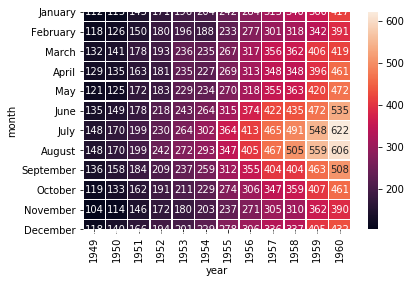

In [ ]:
sns.heatmap(df,annot = True,fmt="d",linewidths=.5);

# Çizgi Grafik

In [ ]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [ ]:
df.shape

(1064, 5)

In [ ]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [ ]:
df["timepoint"].describe().mean()

140.43497515937133

In [ ]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


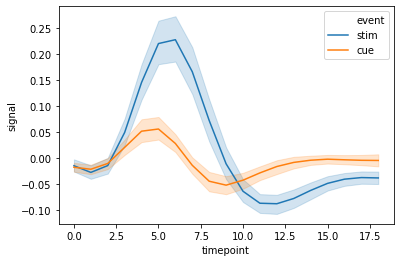

In [ ]:
sns.lineplot(x="timepoint",y = "signal",hue = "event",data=df);

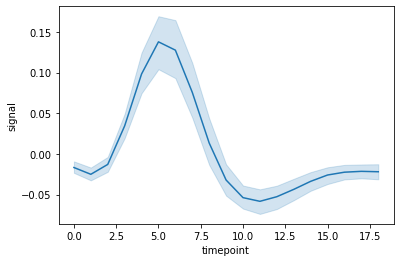

In [ ]:
sns.lineplot(x="timepoint",y = "signal",data=df);

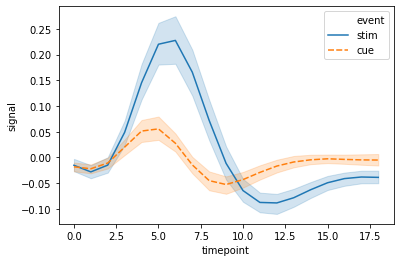

In [ ]:
sns.lineplot(x="timepoint",y = "signal",hue = "event",style="event",data=df);

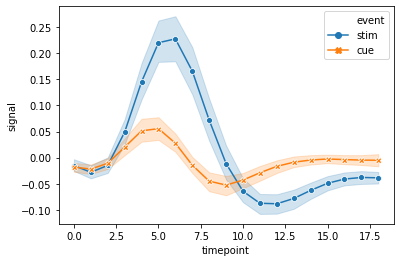

In [ ]:
sns.lineplot(x="timepoint",
            y = "signal",
            hue = "event",
            style = "event",
            markers = True, dashes= False,data=df);

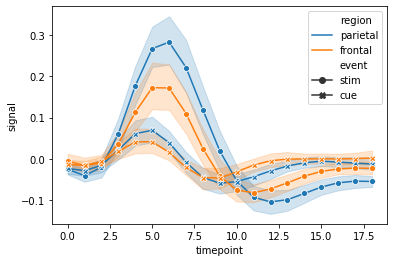

In [ ]:
sns.lineplot(x="timepoint",
            y = "signal",
            hue = "region",
            style = "event",
            markers = True, dashes= False,data=df);

# Basit Zaman Serisi 

In [ ]:
!pip install pandas_datareader
import pandas_datareader as pr

In [ ]:
df = pr.get_data_yahoo("AAPL",start = "2016-01-01",end="2019-08-25")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.400942
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.789471
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.323915
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.339539
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.457672


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
High,917.0,3.909541e+01,9.663354e+00,2.291750e+01,2.908250e+01,4.000000e+01,4.680000e+01,5.836750e+01
Low,917.0,3.842871e+01,9.454082e+00,2.236750e+01,2.868000e+01,3.918000e+01,4.595000e+01,5.744500e+01
Open,917.0,3.875030e+01,9.557526e+00,2.250000e+01,2.884500e+01,3.963250e+01,4.630750e+01,5.769500e+01
Close,917.0,3.877278e+01,9.552587e+00,2.258500e+01,2.895500e+01,3.948000e+01,4.637500e+01,5.801750e+01
Volume,917.0,1.299439e+08,5.898968e+07,4.544800e+07,9.097520e+07,1.135284e+08,1.503472e+08,5.334788e+08
Adj Close,917.0,3.733874e+01,9.725208e+00,2.116598e+01,2.733694e+01,3.817971e+01,4.507350e+01,5.647226e+01


In [ ]:
df.shape

(917, 6)

In [ ]:
kapanis = df["Close"]
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

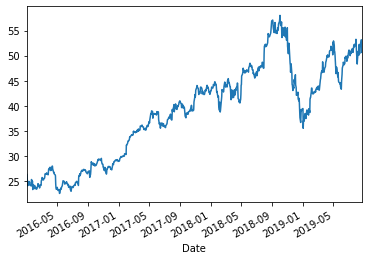

In [ ]:
kapanis.plot();

In [ ]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [ ]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [ ]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

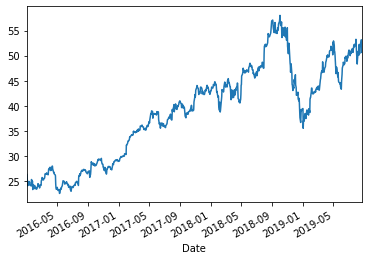

In [ ]:
kapanis.plot();

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')